# Anthropic Haiku Cookbook

Anthropic has released [Claude 3 Haiku](https://www.anthropic.com/news/claude-3-haiku). This notebook provides you to get a quick start with using the Haiku model. It helps you explore the capabilities of model on text and vision tasks.



#### Installation

In [ ]:
!pip install llama-index
!pip install llama-index-llms-anthropic
!pip install llama-index-multi-modal-llms-anthropic

In [ ]:
from llama_index.llms.anthropic import Anthropic
from llama_index.multi_modal_llms.anthropic import AnthropicMultiModal

#### Set API keys

In [ ]:
import os

os.environ["ANTHROPIC_API_KEY"] = "YOUR ANTHROPIC API KEY"

### Using Model for Chat/ Completion

In [ ]:
llm = Anthropic(model="claude-3-haiku-20240307")

In [ ]:
response = llm.complete("LlamaIndex is ")
print(response)

LlamaIndex is an open-source library that provides a set of tools and interfaces for building knowledge-based applications using large language models (LLMs) like GPT-3, GPT-J, and GPT-Neo. It is designed to make it easier to work with LLMs by providing a high-level API for tasks such as:

1. **Data Ingestion**: LlamaIndex supports ingesting a variety of data sources, including text files, PDFs, web pages, and databases, and organizing them into a knowledge graph.

2. **Query Handling**: LlamaIndex provides a simple and intuitive interface for querying the knowledge graph, allowing users to ask questions and get relevant information from the underlying data.

3. **Retrieval and Ranking**: LlamaIndex uses advanced retrieval and ranking algorithms to identify the most relevant information for a given query, leveraging the capabilities of the underlying LLM.

4. **Summarization and Synthesis**: LlamaIndex can generate summaries and synthesize new information based on the content of the kn

### Using Model for Multi-Modal

##### Download image

In [ ]:
!wget 'https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/images/prometheus_paper_card.png' -O 'prometheus_paper_card.png'

--2024-03-14 03:27:01--  https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/images/prometheus_paper_card.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1002436 (979K) [image/png]
Saving to: 'prometheus_paper_card.png'

prometheus_paper_ca 100%[===================>] 978.94K  --.-KB/s    in 0.07s   

2024-03-14 03:27:01 (13.3 MB/s) - 'prometheus_paper_card.png' saved [1002436/1002436]



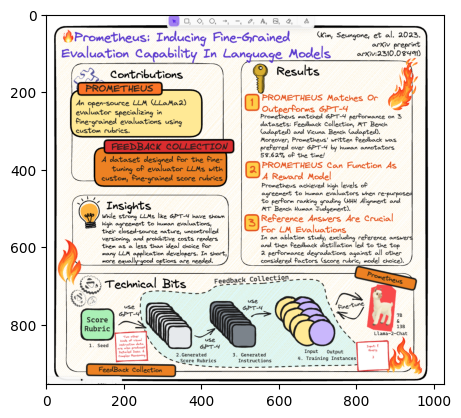

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("prometheus_paper_card.png")
plt.imshow(img)

#### Load the image

In [ ]:
from llama_index.core import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader(
    input_files=["prometheus_paper_card.png"]
).load_data()

# Initiated Anthropic MultiModal class
anthropic_mm_llm = AnthropicMultiModal(
    model="claude-3-haiku-20240307", max_tokens=300
)

#### Test query on image

In [ ]:
response = anthropic_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

print(response)

The image is a poster titled "Prometheus: Inducing Fine-Grained Evaluation Capability In Language Models". It provides information about the Prometheus project, which is an open-source LLM (LLama2) evaluator specializing in fine-grained evaluations using custom rubrics.

The poster is divided into three main sections: Contributions, Results, and Technical Bits.

The Contributions section introduces Prometheus as an open-source LLM evaluator that uses custom rubrics for fine-grained evaluations. The Feedback Collection section describes a dataset designed for fine-tuning evaluator LLMs with custom, fine-grained score rubrics.

The Results section highlights three key findings: 1) Prometheus matches or outperforms GPT-4 on three datasets, and its written feedback was preferred over GPT-4 by human annotators 58.6% of the time; 2) Prometheus can function as a reward model, achieving high levels of agreement with human evaluators when re-purposed for ranking/grading tasks; and 3) reference 

#### Let's compare speed of the responses from different models

We will randomly generate 10 prompts and check the average response time.

##### Generate random 10 prompts

In [ ]:
import random

# Lists of potential subjects and actions
subjects = ["a cat", "an astronaut", "a teacher", "a robot", "a pirate"]
actions = [
    "is exploring a mysterious cave",
    "finds a hidden treasure",
    "solves a complex puzzle",
    "invents a new gadget",
    "discovers a new planet",
]

prompts = []
# Generating 10 random prompts
for _ in range(10):
    subject = random.choice(subjects)
    action = random.choice(actions)
    prompt = f"{subject} {action}"
    prompts.append(prompt)

In [ ]:
import time


# Computes average response time for model and prompts
def average_response_time(model, prompts):
    total_time_taken = 0
    llm = Anthropic(model=model, max_tokens=300)
    for prompt in prompts:
        start_time = time.time()
        _ = llm.complete(prompt)
        end_time = time.time()
        total_time_taken = total_time_taken + end_time - start_time

    return total_time_taken / len(prompts)

In [ ]:
haiku_avg_response_time = average_response_time(
    "claude-3-haiku-20240307", prompts
)

In [ ]:
opus_avg_response_time = average_response_time(
    "claude-3-opus-20240229", prompts
)

In [ ]:
sonnet_avg_response_time = average_response_time(
    "claude-3-sonnet-20240229", prompts
)

In [ ]:
print(f"Avg. time taken by Haiku model: {haiku_avg_response_time} seconds")
print(f"Avg. time taken by Opus model: {opus_avg_response_time} seconds")
print(f"Avg. time taken by Sonnet model: {sonnet_avg_response_time} seconds")

Avg. time taken by Haiku model: 3.87667396068573 seconds
Avg. time taken by Opus model: 18.772309136390685 seconds
Avg. time taken by Sonnet model: 47.86884641647339 seconds
